### **Exploratory Data Analysis**

In this workbook, we will discover some fundamental EDA techniques for text data:
- Distribution Plots
- xxx
- xxx

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk

from nltk import tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer

In [90]:
df_processed = pd.read_excel("amazon_review_processed.xlsx")
df_processed.head(5)

,Review Model,Retailer,Review date,Review name,Review rating,Review title,Review Content,Verified Purchase or not,People_find_helpful,vine or not,...,rating count,overall rating,content_word_count,title_word_count,content_char_count,title_char_count,content_avg_word,title_avg_word,content_stopwords,title_stopwords
0,Canon Pixma TS6420a,Amazon,2023-08-10,Ernest Birkholz,5,work,easy install work great,Verified Purchase,0.0,Not VINE VOICE,...,285,4.2,8,2,38,11,3.875000,5.000000,3,0
1,HP OfficeJet Pro 9015e,Amazon,2022-06-04,mattey,3,spunky mid size,slower speed im used old modelhpojpro 8600 new...,Verified Purchase,0.0,Not VINE VOICE,...,285,4.2,79,4,460,23,4.835443,5.000000,19,0
2,Canon PIXMA MG3620,Amazon,2023-03-15,Maria D,4,𝙲𝚕𝚎𝚊𝚛 𝚙𝚛𝚒𝚗𝚝𝚜,𝙻𝚘𝚟𝚎 𝚒𝚝,Verified Purchase,0.0,Not VINE VOICE,...,285,4.2,2,2,7,12,3.000000,5.500000,0,0
3,Epson - ET-3830,Amazon,2022-11-17,Ryan H,5,shaq know he talking,yup slam dunk upgrade paid little front equiva...,Verified Purchase,12.0,Not VINE VOICE,...,285,4.2,84,6,469,34,4.595238,4.833333,31,2
4,HP ENVY 6055e,Amazon,2022-04-09,Sam,3,user friendly,would think something simple reconnecting wifi...,Verified Purchase,0.0,Not VINE VOICE,...,285,4.2,160,3,861,17,4.387500,5.000000,71,0


In [91]:
df_processed.describe()

,Review rating,People_find_helpful,list price,rating count,overall rating,content_word_count,title_word_count,content_char_count,title_char_count,content_avg_word,title_avg_word,content_stopwords,title_stopwords
count,10209.000000,10209.000000,10209.000000,10209.000000,10209.000000,10209.000000,10209.000000,10209.000000,10209.000000,10209.000000,10209.000000,10209.000000,10209.000000
mean,3.084729,4.683612,201.352083,11595.403076,4.161926,85.707807,5.045254,455.495641,27.783916,4.420605,5.049198,34.220492,1.247527
std,1.587869,23.275835,108.597911,17373.701014,0.099770,102.562293,3.567902,554.849961,19.129711,0.581035,1.610166,42.824573,1.632038
min,1.000000,0.000000,79.990000,285.000000,4.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000
25%,1.000000,0.000000,129.990000,1896.000000,4.100000,24.000000,2.000000,126.000000,14.000000,4.111111,4.000000,8.000000,0.000000
50%,3.000000,0.000000,159.990000,4338.000000,4.100000,54.000000,4.000000,285.000000,23.000000,4.365854,4.750000,21.000000,1.000000
75%,5.000000,3.000000,239.990000,9872.000000,4.200000,109.000000,7.000000,574.000000,36.000000,4.642857,5.750000,44.000000,2.000000
max,5.000000,990.000000,549.990000,53646.000000,4.400000,1439.000000,25.000000,8042.000000,127.000000,10.000000,22.000000,597.000000,12.000000


#### <font color=#FFB703> **Distribution Plots** </font>

<font color=#61BEB0>**Review Distribution:**</font>

<AxesSubplot:xlabel='Review rating'>

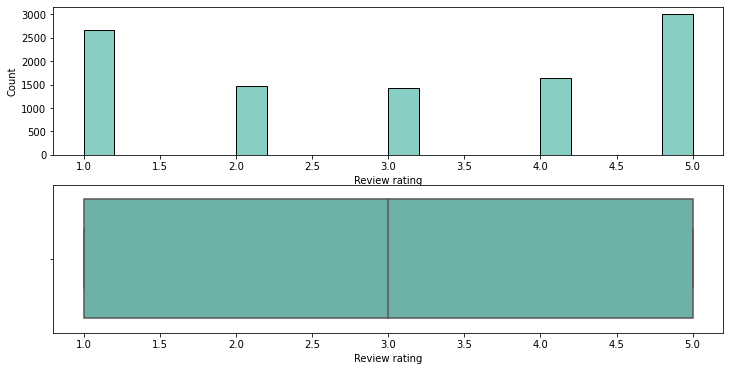

In [137]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
sns.histplot(df_processed['Review rating'], bins=20, kde=False, color = '#61BEB0')
plt.subplot(2, 1, 2)
sns.boxplot(x='Review rating', data=df_processed, color = '#61BEB0')

<font color=#61BEB0>**Word Distribution:**</font>

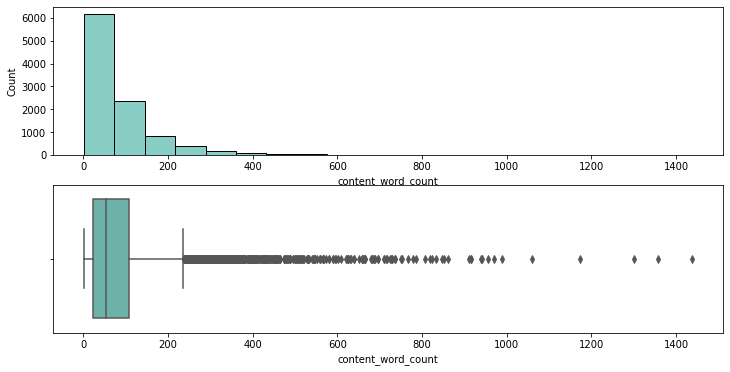

In [136]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
sns.histplot(df_processed['content_word_count'], bins=20, kde=False, color = '#61BEB0')
plt.subplot(2, 1, 2)
sns.boxplot(x='content_word_count', data=df_processed, color = '#61BEB0')
plt.show()

<font color=#61BEB0>**Verified Purchase Distribution:**</font>

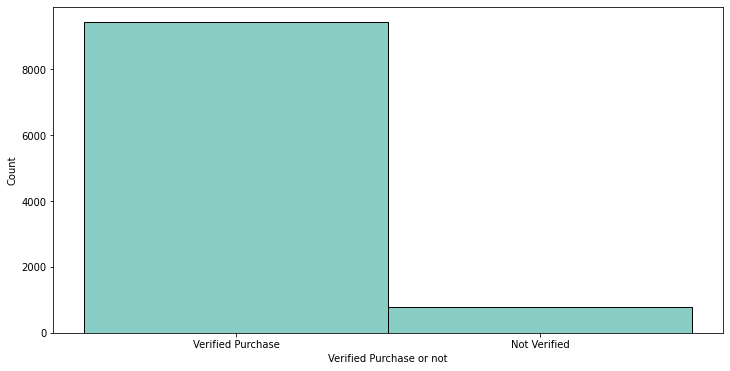

In [134]:
plt.figure(figsize=(12, 6))
sns.histplot(df_processed['Verified Purchase or not'], bins=20, kde=False, color = '#61BEB0')
plt.show()

<font color=#61BEB0>**Vine or Not Distribution:**</font>

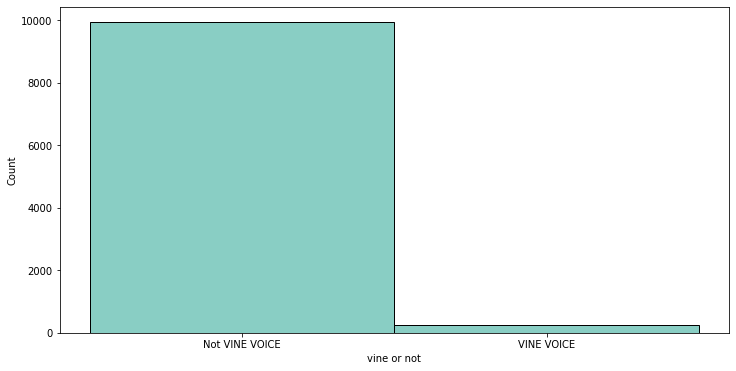

In [133]:
plt.figure(figsize=(12, 6))
sns.histplot(df_processed['vine or not'], bins=20, kde=False, color = '#61BEB0')
plt.show()

<font color=#61BEB0>**Review Date Distribution:**</font>

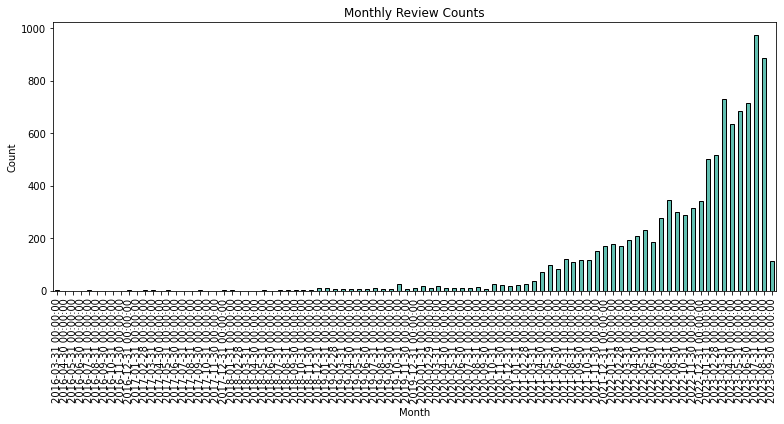

In [132]:
df_processed['Review date'] = pd.to_datetime(df_processed['Review date'])
df_time = df_processed.set_index('Review date')
monthly_counts = df_time.resample('M').size()

plt.figure(figsize=(11, 6))
monthly_counts.plot(kind='bar', color = '#61BEB0', edgecolor = 'black')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Monthly Review Counts')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

<font color=#61BEB0>**Correlation Heatmap:**</font>

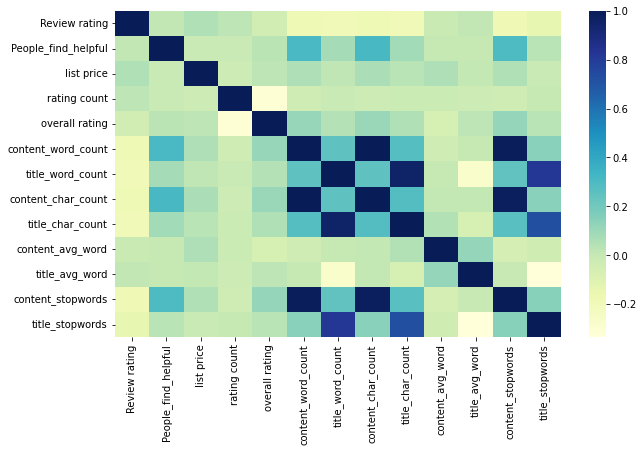

In [130]:
correlation_matrix = df_processed.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=False, cmap='YlGnBu') # Change annot to True to see values
plt.show()

<font color=#61BEB0>**People Find Helpful Distribution:**</font>

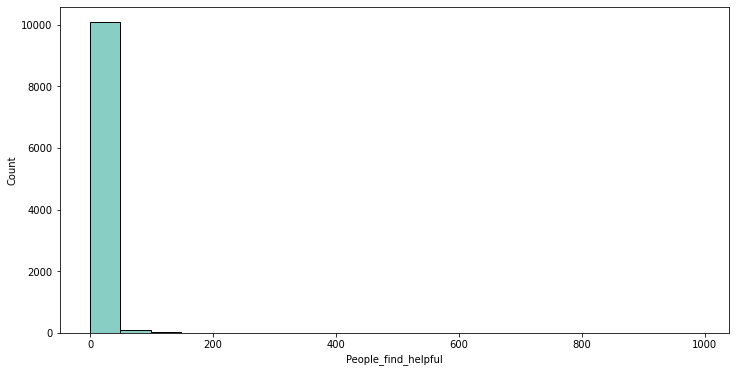

In [127]:
plt.figure(figsize=(12, 6))
sns.histplot(df_processed['People_find_helpful'], bins=20, kde=False, color = '#61BEB0')
plt.show()

<font color=#61BEB0>**List Price Distribution:**</font>

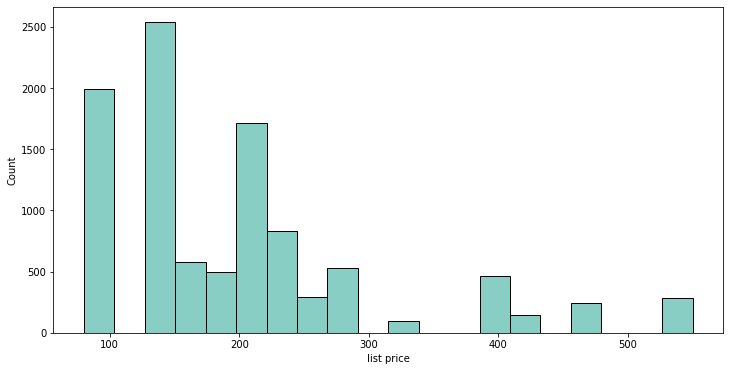

In [142]:
plt.figure(figsize=(12, 6))
sns.histplot(df_processed['list price'], bins=20, kde=False, color = '#61BEB0')
plt.show()

<font color=#61BEB0>**Rating Count Distribution:**</font>

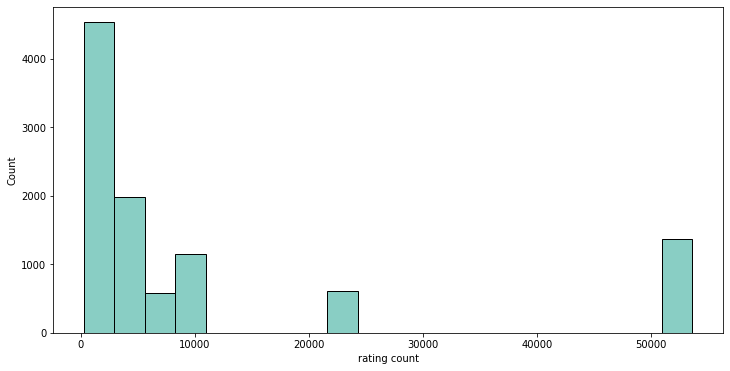

In [143]:
plt.figure(figsize=(12, 6))
sns.histplot(df_processed['rating count'], bins=20, kde=False, color = '#61BEB0')
plt.show()

<font color=#61BEB0>**Overall Rating Distribution:**</font>

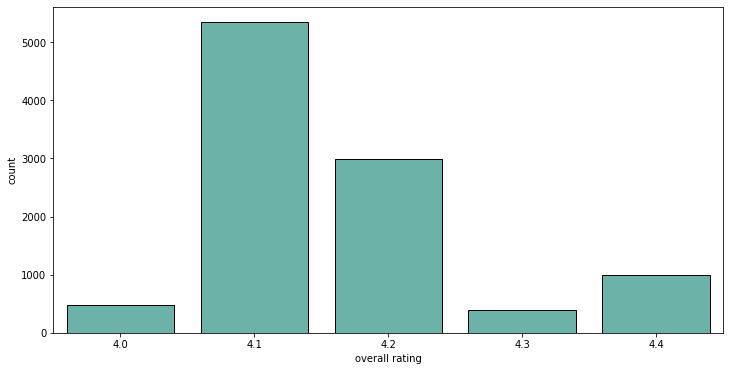

In [126]:
plt.figure(figsize=(12, 6))
sns.countplot(x='overall rating', data=df_processed, color = '#61BEB0', edgecolor = 'black')
plt.show()

<font color=#61BEB0>**Review Rating Distribution:**</font>

In [101]:
df_processed["Review rating"].value_counts()

5    3011
1    2663
4    1642
2    1473
3    1420
Name: Review rating, dtype: int64

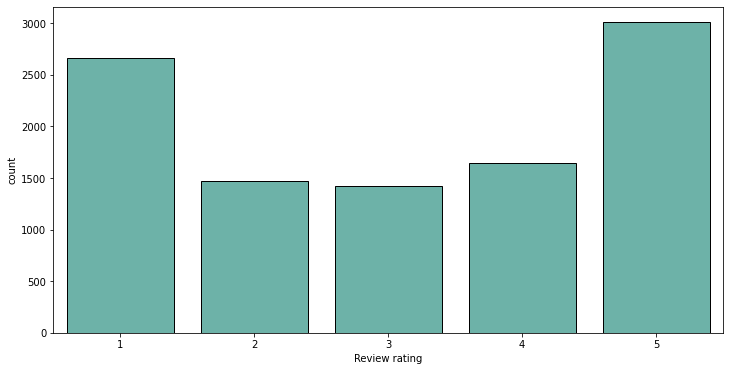

In [141]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Review rating', data=df_processed, color = '#61BEB0', edgecolor = 'black')
plt.show()